In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('diabetes.csv') 

df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


# Przygotowanie danych

Zmiana nazw kolumn, tam gdzie znajduje się . --> _

In [ ]:
df.rename(columns={'stab.glu':'stab_glu', 'ratio':'chol_ratio','bp.1s':'bp_1s', 'bp.1d':'bp_1d',
                   'bp.2s':'bp_2s', 'bp.2d':'bp_2d', 'time.ppn':'time_ppn'}, inplace=True)

df.head(10)

,id,chol,stab_glu,hdl,chol_ratio,glyhb,location,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,time_ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
5,1008,248.0,94,69.0,3.6,4.81,Buckingham,34,male,71.0,190.0,large,132.0,86.0,NaN,NaN,36.0,42.0,195.0
6,1011,195.0,92,41.0,4.8,4.84,Buckingham,30,male,69.0,191.0,medium,161.0,112.0,161.0,112.0,46.0,49.0,720.0
7,1015,227.0,75,44.0,5.2,3.94,Buckingham,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0,1020.0
8,1016,177.0,87,49.0,3.6,4.84,Buckingham,45,male,69.0,166.0,large,160.0,80.0,128.0,86.0,34.0,40.0,300.0
9,1022,263.0,89,40.0,6.6,5.78,Buckingham,55,female,63.0,202.0,small,108.0,72.0,NaN,NaN,45.0,50.0,240.0


Usunięcie kolumn id oraz location - brak istotności

In [ ]:
df.drop('id', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)

df.head(10)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,time_ppn
0,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
5,248.0,94,69.0,3.6,4.81,34,male,71.0,190.0,large,132.0,86.0,NaN,NaN,36.0,42.0,195.0
6,195.0,92,41.0,4.8,4.84,30,male,69.0,191.0,medium,161.0,112.0,161.0,112.0,46.0,49.0,720.0
7,227.0,75,44.0,5.2,3.94,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0,1020.0
8,177.0,87,49.0,3.6,4.84,45,male,69.0,166.0,large,160.0,80.0,128.0,86.0,34.0,40.0,300.0
9,263.0,89,40.0,6.6,5.78,55,female,63.0,202.0,small,108.0,72.0,NaN,NaN,45.0,50.0,240.0


Dodanie kolumny przedstawiającej stosunek waist/hip (ważny parametr z punktu widzenia autora publikacji)

In [ ]:
df['whr'] = round((df.waist / df.hip), 2)
df.drop(['waist', 'hip'], axis=1, inplace=True)

df.head(10)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr
0,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,720.0,0.76
1,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,360.0,0.96
2,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,180.0,0.86
3,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,480.0,0.87
4,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,300.0,1.07
5,248.0,94,69.0,3.6,4.81,34,male,71.0,190.0,large,132.0,86.0,NaN,NaN,195.0,0.86
6,195.0,92,41.0,4.8,4.84,30,male,69.0,191.0,medium,161.0,112.0,161.0,112.0,720.0,0.94
7,227.0,75,44.0,5.2,3.94,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,1020.0,0.87
8,177.0,87,49.0,3.6,4.84,45,male,69.0,166.0,large,160.0,80.0,128.0,86.0,300.0,0.85
9,263.0,89,40.0,6.6,5.78,55,female,63.0,202.0,small,108.0,72.0,NaN,NaN,240.0,0.90


Dodanie kolumny bmi

**BMI = (weight in pounds x 703) / (height in inches x height in inches)**

In [ ]:
df['bmi'] = round(((df.weight / (df.height)**2) * 703), 1)
df.drop(['height', 'weight'], axis=1, inplace=True)

df.head(10)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr,bmi
0,203.0,82,56.0,3.6,4.31,46,female,medium,118.0,59.0,NaN,NaN,720.0,0.76,22.1
1,165.0,97,24.0,6.9,4.44,29,female,large,112.0,68.0,NaN,NaN,360.0,0.96,37.4
2,228.0,92,37.0,6.2,4.64,58,female,large,190.0,92.0,185.0,92.0,180.0,0.86,48.4
3,78.0,93,12.0,6.5,4.63,67,male,large,110.0,50.0,NaN,NaN,480.0,0.87,18.6
4,249.0,90,28.0,8.9,7.72,64,male,medium,138.0,80.0,NaN,NaN,300.0,1.07,27.8
5,248.0,94,69.0,3.6,4.81,34,male,large,132.0,86.0,NaN,NaN,195.0,0.86,26.5
6,195.0,92,41.0,4.8,4.84,30,male,medium,161.0,112.0,161.0,112.0,720.0,0.94,28.2
7,227.0,75,44.0,5.2,3.94,37,male,medium,NaN,NaN,NaN,NaN,1020.0,0.87,34.3
8,177.0,87,49.0,3.6,4.84,45,male,large,160.0,80.0,128.0,86.0,300.0,0.85,24.5
9,263.0,89,40.0,6.6,5.78,55,female,small,108.0,72.0,NaN,NaN,240.0,0.90,35.8


Dodanie kolumny przedstawiającej, czy dana osoba ma cukrzyce



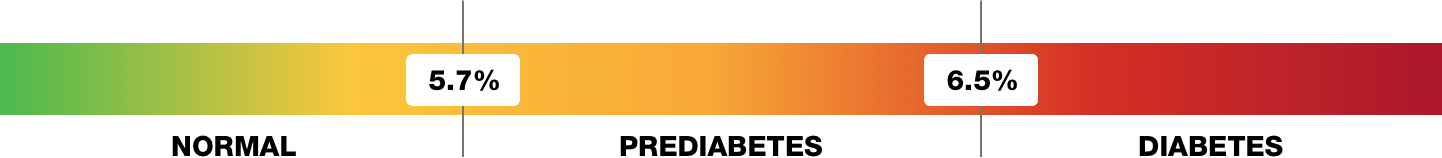

Zmiana typu danych kolumn gender, frame i have_diabetes

In [ ]:
# male=1 female=0
# large=2, medium=1, small=0
# no_diabetes=0, prediabetes=1, diabetes=2

In [ ]:
df.loc[df["gender"] == "male", "gender"] = 1
df.loc[df["gender"] == "female", "gender"] = 0

df.loc[df["frame"] == "large", "frame"] = 2
df.loc[df["frame"] == "medium", "frame"] = 1
df.loc[df["frame"] == "small", "frame"] = 0



df.head(10)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr,bmi
0,203.0,82,56.0,3.6,4.31,46,0,1,118.0,59.0,NaN,NaN,720.0,0.76,22.1
1,165.0,97,24.0,6.9,4.44,29,0,2,112.0,68.0,NaN,NaN,360.0,0.96,37.4
2,228.0,92,37.0,6.2,4.64,58,0,2,190.0,92.0,185.0,92.0,180.0,0.86,48.4
3,78.0,93,12.0,6.5,4.63,67,1,2,110.0,50.0,NaN,NaN,480.0,0.87,18.6
4,249.0,90,28.0,8.9,7.72,64,1,1,138.0,80.0,NaN,NaN,300.0,1.07,27.8
5,248.0,94,69.0,3.6,4.81,34,1,2,132.0,86.0,NaN,NaN,195.0,0.86,26.5
6,195.0,92,41.0,4.8,4.84,30,1,1,161.0,112.0,161.0,112.0,720.0,0.94,28.2
7,227.0,75,44.0,5.2,3.94,37,1,1,NaN,NaN,NaN,NaN,1020.0,0.87,34.3
8,177.0,87,49.0,3.6,4.84,45,1,2,160.0,80.0,128.0,86.0,300.0,0.85,24.5
9,263.0,89,40.0,6.6,5.78,55,0,0,108.0,72.0,NaN,NaN,240.0,0.90,35.8


Zastąpienie wartości NaN średnią wartością z danej kolumny

In [ ]:
for i in df.columns[df.isnull().any(axis=0)]:
  df[i].fillna(df[i].mean(), inplace=True)
        
df.head(21)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr,bmi
0,203.0,82,56.0,3.6,4.31,46,0,1.0,118.000000,59.000000,152.382979,92.524823,720.0,0.76,22.1
1,165.0,97,24.0,6.9,4.44,29,0,2.0,112.000000,68.000000,152.382979,92.524823,360.0,0.96,37.4
2,228.0,92,37.0,6.2,4.64,58,0,2.0,190.000000,92.000000,185.000000,92.000000,180.0,0.86,48.4
3,78.0,93,12.0,6.5,4.63,67,1,2.0,110.000000,50.000000,152.382979,92.524823,480.0,0.87,18.6
4,249.0,90,28.0,8.9,7.72,64,1,1.0,138.000000,80.000000,152.382979,92.524823,300.0,1.07,27.8
5,248.0,94,69.0,3.6,4.81,34,1,2.0,132.000000,86.000000,152.382979,92.524823,195.0,0.86,26.5
6,195.0,92,41.0,4.8,4.84,30,1,1.0,161.000000,112.000000,161.000000,112.000000,720.0,0.94,28.2
7,227.0,75,44.0,5.2,3.94,37,1,1.0,136.904523,83.321608,152.382979,92.524823,1020.0,0.87,34.3
8,177.0,87,49.0,3.6,4.84,45,1,2.0,160.000000,80.000000,128.000000,86.000000,300.0,0.85,24.5
9,263.0,89,40.0,6.6,5.78,55,0,0.0,108.000000,72.000000,152.382979,92.524823,240.0,0.90,35.8


Normalizacja danych - skalowanie metodą min max

In [ ]:
normalized_df = (df-df.min())/(df.max()-df.min())

normalized_df.head(21)

,chol,stab_glu,hdl,chol_ratio,glyhb,age,gender,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr,bmi
0,0.342466,0.10089,0.407407,0.117978,0.12137,0.369863,0.0,0.5,0.175,0.144737,0.331117,0.5082,0.459807,0.173913,0.169951
1,0.238356,0.145401,0.111111,0.303371,0.13105,0.136986,0.0,1.0,0.1375,0.263158,0.331117,0.5082,0.228296,0.608696,0.546798
2,0.410959,0.130564,0.231481,0.264045,0.145942,0.534247,0.0,1.0,0.625,0.578947,0.585938,0.5,0.11254,0.391304,0.817734
3,0.0,0.133531,0.0,0.280899,0.145197,0.657534,1.0,1.0,0.125,0.026316,0.331117,0.5082,0.305466,0.413043,0.083744
4,0.468493,0.124629,0.148148,0.41573,0.375279,0.616438,1.0,0.5,0.3,0.421053,0.331117,0.5082,0.189711,0.847826,0.310345
5,0.465753,0.136499,0.527778,0.117978,0.1586,0.205479,1.0,1.0,0.2625,0.5,0.331117,0.5082,0.122186,0.391304,0.278325
6,0.320548,0.130564,0.268519,0.185393,0.160834,0.150685,1.0,0.5,0.44375,0.842105,0.398438,0.8125,0.459807,0.565217,0.320197
7,0.408219,0.080119,0.296296,0.207865,0.09382,0.246575,1.0,0.5,0.293153,0.464758,0.331117,0.5082,0.652733,0.413043,0.470443
8,0.271233,0.115727,0.342593,0.117978,0.160834,0.356164,1.0,1.0,0.4375,0.421053,0.140625,0.40625,0.189711,0.369565,0.229064
9,0.506849,0.121662,0.259259,0.286517,0.230827,0.493151,0.0,0.0,0.1125,0.315789,0.331117,0.5082,0.151125,0.478261,0.507389


In [ ]:
normalized_df['have_diabetes'] = normalized_df.glyhb.apply(lambda a: 0 if a < 0.23 else 2 if a >= 0.284 else 1)
normalized_df.drop(['glyhb'], axis=1, inplace=True)
normalized_df.head(10)

,chol,stab_glu,hdl,chol_ratio,age,gender,frame,bp_1s,bp_1d,bp_2s,bp_2d,time_ppn,whr,bmi,have_diabetes
0,0.342466,0.10089,0.407407,0.117978,0.369863,0.0,0.5,0.175,0.144737,0.331117,0.5082,0.459807,0.173913,0.169951,0
1,0.238356,0.145401,0.111111,0.303371,0.136986,0.0,1.0,0.1375,0.263158,0.331117,0.5082,0.228296,0.608696,0.546798,0
2,0.410959,0.130564,0.231481,0.264045,0.534247,0.0,1.0,0.625,0.578947,0.585938,0.5,0.11254,0.391304,0.817734,0
3,0.0,0.133531,0.0,0.280899,0.657534,1.0,1.0,0.125,0.026316,0.331117,0.5082,0.305466,0.413043,0.083744,0
4,0.468493,0.124629,0.148148,0.41573,0.616438,1.0,0.5,0.3,0.421053,0.331117,0.5082,0.189711,0.847826,0.310345,2
5,0.465753,0.136499,0.527778,0.117978,0.205479,1.0,1.0,0.2625,0.5,0.331117,0.5082,0.122186,0.391304,0.278325,0
6,0.320548,0.130564,0.268519,0.185393,0.150685,1.0,0.5,0.44375,0.842105,0.398438,0.8125,0.459807,0.565217,0.320197,0
7,0.408219,0.080119,0.296296,0.207865,0.246575,1.0,0.5,0.293153,0.464758,0.331117,0.5082,0.652733,0.413043,0.470443,0
8,0.271233,0.115727,0.342593,0.117978,0.356164,1.0,1.0,0.4375,0.421053,0.140625,0.40625,0.189711,0.369565,0.229064,0
9,0.506849,0.121662,0.259259,0.286517,0.493151,0.0,0.0,0.1125,0.315789,0.331117,0.5082,0.151125,0.478261,0.507389,1


# Wizualizacja danych

Odchylenie standardowe

In [ ]:
df.std().sort_values(ascending=False)

time_ppn      308.383786
stab_glu       53.076655
chol           44.390242
bp_1s          22.599166
hdl            17.241141
age            16.312333
bp_1d          13.504452
bp_2s          12.813562
bp_2d           6.819121
bmi             6.558037
glyhb           2.206036
chol_ratio      1.725736
frame           0.717579
gender          0.494067
whr             0.072295
dtype: float64

In [ ]:
normalized_df.std().sort_values(ascending=False)

have_diabetes    0.747583
gender           0.494067
frame            0.358789
age              0.223457
time_ppn         0.198318
bp_1d            0.177690
bmi              0.161528
hdl              0.159640
stab_glu         0.157497
whr              0.157162
bp_1s            0.141245
chol             0.121617
bp_2d            0.106549
bp_2s            0.100106
chol_ratio       0.096951
dtype: float64

Histogramy

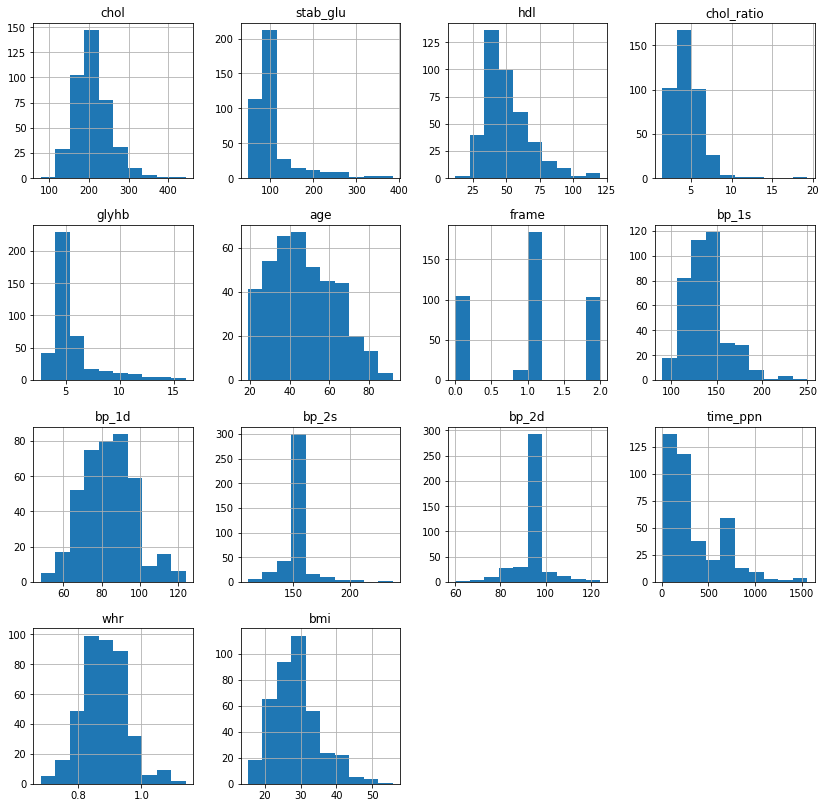

In [ ]:
df.hist(figsize=(14,14))

plt.show()



Kolumna have_diabetes


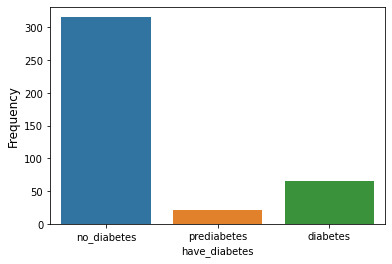

In [ ]:
sns.countplot(x='have_diabetes', data=normalized_df)
plt.ylabel('Frequency', size=12)
plt.xticks((0, 1, 2), ("no_diabetes", "prediabetes", "diabetes"))

plt.show()

In [ ]:
d = df.have_diabetes.value_counts()
labels = ['no_diabetes', 'diabetes', 'prediabetes']

print("Have diabetes   column   count")
for i in d.index:
  print(labels[i], '\t', d[i], '\t', round(100*d[i]/len(df.have_diabetes), 2), '%')

AttributeError: ignored

Heatmapa

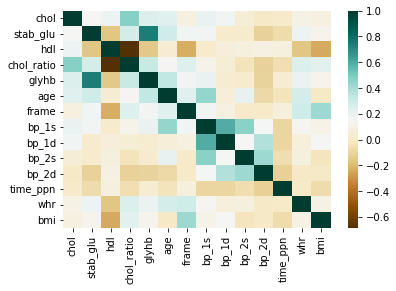

In [ ]:
sns.heatmap(df.corr(),cmap="BrBG",annot=False)

Dendrogram

In [ ]:
def plot_dendrogram(data, linkage_method, p):
    plt.figure(figsize=(15,8))
    dendro = sch.dendrogram(sch.linkage(data, method=linkage_method), truncate_mode='lastp', p=p)
    plt.ylabel(f'kryterium łączenia klastrów ({linkage_method})',fontsize=15)
    plt.title(f'dendrogram dla kryterium: {linkage_method}',fontsize=15)

    plt.show()

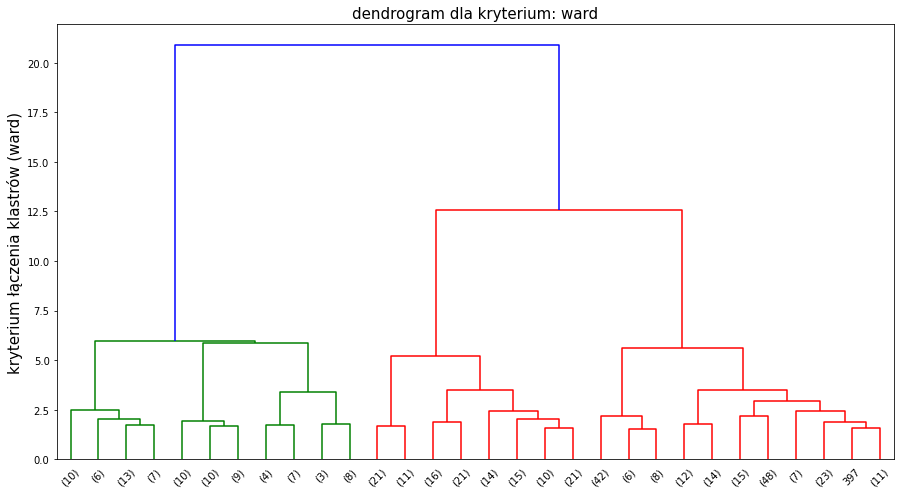

In [ ]:
plot_dendrogram(normalized_df, 'ward', 30)
#'ward'     - metryka minimalizująca wariancję łączonych klastrów

In [ ]:
X = normalized_df.iloc[:,0:14].values
y = normalized_df.iloc[:,14].values
y=y.astype('int')

print('The independent features set: ')
print(X[1])
print('The dependent variable: ')
print(y)

The independent features set: 
[0.23835616438356164 0.14540059347181009 0.1111111111111111
 0.30337080576947445 0.136986301369863 0.0 1.0 0.1375 0.2631578947368421
 0.3311170212765957 0.5082003546099292 0.2282958199356913
 0.6086956521739131 0.5467980295566504]
The dependent variable: 
[0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 2 0 0 0 0 1 0 1 2 1 0 0 0 1 0 2 1 0 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0
 1 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 2 0 0 0 2 0 0 1 1 2 2 0 0 0 2 0 0 0 1
 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0
 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0
 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 1 2 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0

In [ ]:
w_class0 = np.where(y == 0)[0]
w_class1 = np.where(y == 1)[0]
w_class2 = np.where(y == 2)[0]

n_class0 = len(w_class0) 
n_class1 = len(w_class1)
n_class2 = len(w_class2)

normalized_undersampled_df=normalized_df.drop(normalized_df.query('have_diabetes == 0').sample(n =251).index)
normalized_undersampled_df

X_un = normalized_undersampled_df.iloc[:,0:14].values
y_un = normalized_undersampled_df.iloc[:,14].values
y_un=y_un.astype('int')

w_class0 = np.where(y_un == 0)[0]
w_class1 = np.where(y_un == 1)[0]
w_class2 = np.where(y_un == 2)[0]

n_class0 = len(w_class0) 
n_class1 = len(w_class1)
n_class2 = len(w_class2)

print("n_class0: ", n_class0)
print("n_class1: ", n_class1)
print("n_class2: ", n_class2)

n_class0:  316
n_class1:  22
n_class2:  65
n_class0:  65
n_class1:  22
n_class2:  65


In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X_un, y_un, test_size = 0.2, random_state = 43)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())
X_train_res_un, y_train_res_un = oversample.fit_resample(X_train_un, y_train_un.ravel())


# Modele

In [ ]:
def classification_metrics(model, X_test, y_test, y_pred):
    print("Wektor etykiet dla danych testowych:", y_test, '\n\n')
    print("Wektor etykiet wytypowany przez klasyfikator:", '\n\n')

    print('Accuracy: \n', model.score(X_test, y_test), '\n\n')
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred, labels=[0, 1, 2]), '\n\n')
    print('Classification report \n', classification_report(y_test, y_pred), '\n\n')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=model.classes_), display_labels=model.classes_)
    disp.plot()

In [ ]:
def cross_validation(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

### **Random Forest**

Niezbalansowane dane

In [ ]:
rf_clr = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
rf_clr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=42)

In [ ]:
y_pred = rf_clr.predict(X_test)

Wektor etykiet dla danych testowych: [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0
 2 0 0 0 0 0 0] 


Wektor etykiet wytypowany przez klasyfikator: 


Accuracy: 
 0.9012345679012346 


Confusion matrix: 
 [[64  0  0]
 [ 5  0  1]
 [ 2  0  9]] 


Classification report 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        64
           1       0.00      0.00      0.00         6
           2       0.90      0.82      0.86        11

    accuracy                           0.90        81
   macro avg       0.60      0.61      0.60        81
weighted avg       0.83      0.90      0.87        81
 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


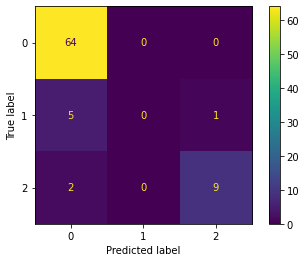

In [ ]:
classification_metrics(rf_clr, X_test, y_test, y_pred)

In [ ]:
cr=cross_val_score(rf_clr, X_train, y_train, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.845 (0.024)


In [ ]:
cr=cross_val_score(rf_clr, X_test, y_test, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.827 (0.046)


Zbalansowane dane

Oversampling

In [ ]:
classifier_sm = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_sm.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier_sm.predict(X_test)

Wektor etykiet dla danych testowych: [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0
 2 0 0 0 0 0 0] 


Wektor etykiet wytypowany przez klasyfikator: 


Accuracy: 
 0.8518518518518519 


Confusion matrix: 
 [[61  3  0]
 [ 5  0  1]
 [ 3  0  8]] 


Classification report 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        64
           1       0.00      0.00      0.00         6
           2       0.89      0.73      0.80        11

    accuracy                           0.85        81
   macro avg       0.59      0.56      0.57        81
weighted avg       0.82      0.85      0.83        81
 




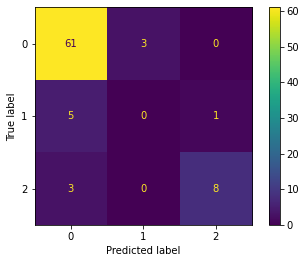

In [ ]:
classification_metrics(classifier_sm, X_test, y_test, y_pred)

In [ ]:
cr=cross_val_score(classifier_sm, X_train_res, y_train_res, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.947 (0.013)


In [ ]:
cr=cross_val_score(classifier_sm, X_test, y_test, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.852 (0.049)


Undersampling +SMOTE

In [ ]:
classifier_sm_un = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_sm_un.fit(X_train_res_un, y_train_res_un.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier_sm_un.predict(X_test)

Wektor etykiet dla danych testowych: [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0
 2 0 0 0 0 0 0] 


Wektor etykiet wytypowany przez klasyfikator: 


Accuracy: 
 0.8641975308641975 


Confusion matrix: 
 [[54  7  3]
 [ 1  5  0]
 [ 0  0 11]] 


Classification report 
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        64
           1       0.42      0.83      0.56         6
           2       0.79      1.00      0.88        11

    accuracy                           0.86        81
   macro avg       0.73      0.89      0.78        81
weighted avg       0.91      0.86      0.88        81
 




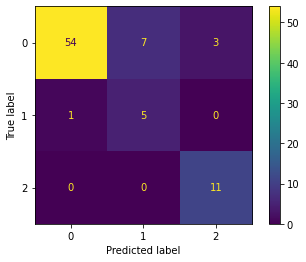

In [ ]:
classification_metrics(classifier_sm_un, X_test, y_test, y_pred)

In [ ]:
cr=cross_val_score(classifier_sm_un, X_train_res_un, y_train_res_un, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.853 (0.033)


In [ ]:
cr=cross_val_score(classifier_sm_un, X_test, y_test, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cr), np.std(cr)))

Mean Accuracy: 0.852 (0.049)


### SVM

Niezbalansowane dane

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

Accuracy: 
 0.8641975308641975 


Confusion matrix: 
 [[64  0  0]
 [ 5  0  1]
 [ 5  0  6]] 


Classification report 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        64
           1       0.00      0.00      0.00         6
           2       0.86      0.55      0.67        11

    accuracy                           0.86        81
   macro avg       0.57      0.52      0.53        81
weighted avg       0.80      0.86      0.82        81
 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


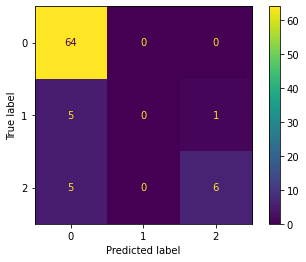

In [ ]:
classification_metrics(clf, X_test, y_test, y_pred)

Zbalansowane dane

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

Accuracy: 
 0.8641975308641975 


Confusion matrix: 
 [[64  0  0]
 [ 5  0  1]
 [ 5  0  6]] 


Classification report 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        64
           1       0.00      0.00      0.00         6
           2       0.86      0.55      0.67        11

    accuracy                           0.86        81
   macro avg       0.57      0.52      0.53        81
weighted avg       0.80      0.86      0.82        81
 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


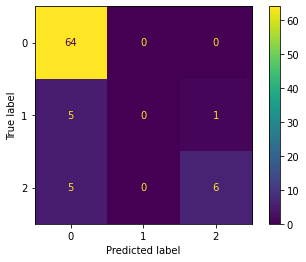

In [ ]:
classification_metrics(clf, X_test, y_test, y_pred)

### Logistic Regression

Niezbalansowane dane

In [ ]:
lr_clr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_clr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = lr_clr.predict(X_test)

Accuracy: 
 0.8518518518518519 


Confusion matrix: 
 [[64  0  0]
 [ 5  0  1]
 [ 6  0  5]] 


Classification report 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        64
           1       0.00      0.00      0.00         6
           2       0.83      0.45      0.59        11

    accuracy                           0.85        81
   macro avg       0.56      0.48      0.50        81
weighted avg       0.79      0.85      0.81        81
 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


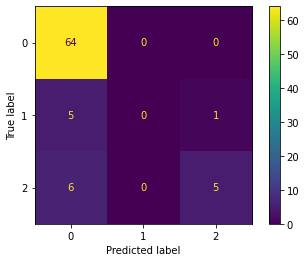

In [ ]:
classification_metrics(lr_clr, X_test, y_test, y_pred)

In [ ]:
cv = cross_val_score(lr_clr, X_train_res, y_train_res, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cv), np.std(cv)))

Mean Accuracy: 0.747 (0.016)


In [ ]:
cv = cross_val_score(lr_clr, X_test, y_test, cv=5, scoring="accuracy")
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(cv), np.std(cv)))

Mean Accuracy: 0.803 (0.044)


Zbalansowane dane

In [ ]:
lr_clr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_clr.fit(X_train_res_un, y_train_res_un.ravel())

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = lr_clr.predict(X_test)

Accuracy: 
 0.691358024691358 


Confusion matrix: 
 [[49 13  2]
 [ 3  2  1]
 [ 2  4  5]] 


Classification report 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        64
           1       0.11      0.33      0.16         6
           2       0.62      0.45      0.53        11

    accuracy                           0.69        81
   macro avg       0.55      0.52      0.51        81
weighted avg       0.81      0.69      0.74        81
 




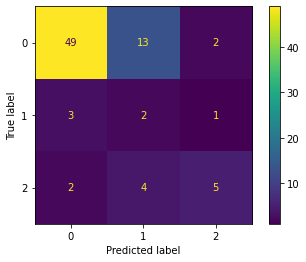

In [ ]:
classification_metrics(lr_clr, X_test, y_test, y_pred)

In [ ]:
cross_validation(lr_clr, X_train_res, y_train_res)

Mean Accuracy: 0.754 (0.042)


In [ ]:
cross_validation(lr_clr, X_test, y_test)

Mean Accuracy: 0.802 (0.036)
